### Question 9.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

In [4]:
x_1 = np.linspace(0,6, 100)
x_2 = np.linspace(0, 6, 100)

In [9]:
def sigma(x):
    s = 1 / (1 + np.exp(-x)) - 0.5
    return s

def sign(x):
    s = [1 if i > 0 else 0 for i in x]
    return s

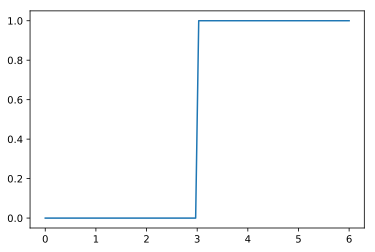

In [10]:
plt.plot(x_2, sign(sigma(x_2-3)))

#### Answer: 4.D

### Question 10.

In this question, we'll be working with Sklearn's bias-variance decomposition example. There they compare a decision tree regressor and bagging over the same trees. In our case, we'll compare 4 decision trees - with maximal depths of 1, 2, 5, and 10 (in all cases random_state shall be set to 17). So you need to take the same code from the example and change the estimators variable.

Your task is to:

read about bias-variance decomposition in the mlcourse.ai article
understand the code form the mentioned sklearn's example
understand what you changed in the code and how it affected the figures built in the end of the example
When you're done with that, choose all correct statements:

Variance always increases with increased max_depth
Minimal MSE is achieved when max_depth is set to 5
Minimal MSE is achieved when bias is also minimal
Minimal MSE is achieved when variance is also minimal
The tree with max_depth=10 is overfitted

Tree_1: 0.1621 (error) = 0.1370 (bias^2)  + 0.0153 (var) + 0.0098 (noise)
Tree_2: 0.0521 (error) = 0.0248 (bias^2)  + 0.0173 (var) + 0.0098 (noise)
Tree_5: 0.0239 (error) = 0.0009 (bias^2)  + 0.0130 (var) + 0.0098 (noise)
Tree_10: 0.0248 (error) = 0.0004 (bias^2)  + 0.0144 (var) + 0.0098 (noise)


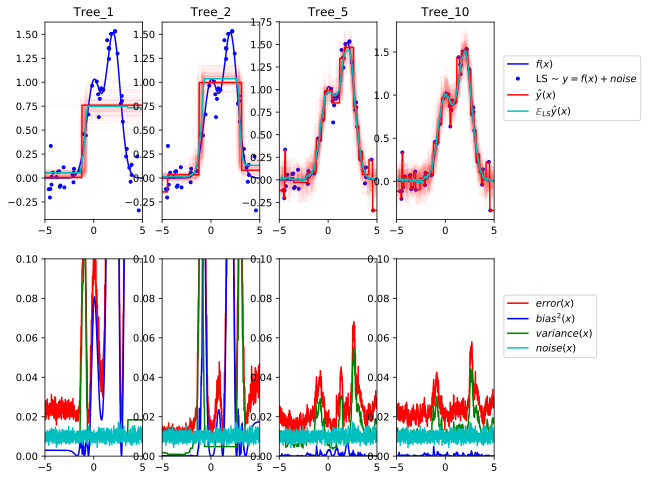

In [11]:
# Author: Gilles Louppe <g.louppe@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Settings
n_repeat = 50       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise
np.random.seed(17)

# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).
#estimators = [("Tree", DecisionTreeRegressor()),
#              ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor()))]

estimators = [('Tree_1', DecisionTreeRegressor(max_depth = 1, random_state = 17)),
             ('Tree_2', DecisionTreeRegressor(max_depth = 2, random_state = 17)),
             ('Tree_5', DecisionTreeRegressor(max_depth = 5, random_state = 17)),
             ('Tree_10', DecisionTreeRegressor(max_depth = 10, random_state = 17))]

n_estimators = len(estimators)


# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)


def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

plt.figure(figsize=(10, 8))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))

    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label=r"$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, .5))

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == n_estimators - 1:

        plt.legend(loc=(1.1, .5))

plt.subplots_adjust(right=.75)
plt.show()

#### Answer: 2,4,5